In [1]:
#distribution of plates; train dev and test
import json
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ann_dirpath = "../data/anpr_ocr__train/ann"
test_dirpath = "../data/anpr_ocr__test/img"

In [3]:
test_cnt= len(os.listdir(test_dirpath))
val_cnt=0
train_cnt=0
for fx in os.listdir(ann_dirpath):
    with open(ann_dirpath + "/" + fx) as f:       
        source_data = json.load(f) 
        #print(source_data['tags'])
        if source_data['tags'] == ['val']:
            val_cnt+=1
        else:
            train_cnt +=1

In [4]:
print("Total count of files:",len(os.listdir(ann_dirpath))+ len(os.listdir(test_dirpath)))
print("Total count of training set:",train_cnt)
print("Total count of val set:",val_cnt)
print("Total count of test set:",test_cnt)

Total count of files: 4608
Total count of training set: 3685
Total count of val set: 461
Total count of test set: 462


In [5]:
import keras
import tensorflow as tf
import sys
import os
from keras import backend as K
import itertools

sess = tf.Session()
K.set_session(sess)

sys.path.append(os.path.dirname(os.path.realpath('Textgen')) + "/python")
import Textgen as t

#load model
loaded_model=t.load_model()

Using TensorFlow backend.


In [14]:
tiger_test = t.TextImageGenerator('../data/anpr_ocr__test/img', 'test', 128, 64, test_cnt , 4) # batch size 
tiger_test.build_data()
net_inp = loaded_model.get_layer(name='the_input').input
net_out = loaded_model.get_layer(name='softmax').output

In [17]:
nmatch_str=[]
matched=0
non_matched=0
for inp_value, _ in tiger_test.next_batch(K):
     
    
    testset_cnt = inp_value['the_input'].shape[0]
    X_data = inp_value['the_input']
    #print(inp_value['the_label'])
    
    net_out_value = sess.run(net_out, feed_dict={net_inp:X_data})
    pred_texts = t.decode_batch(net_out_value)
    
    labels = inp_value['the_labels']
    texts = []     
    
    for label in labels:        
        text = t.labels_to_text(label)        
        texts.append(text)       
        #print("text:",text)
    
    for cnt in range(testset_cnt-1):        
        #print("cnt:",cnt)
        if pred_texts[cnt] == texts[cnt]:
            matched += 1            
        else:
            non_matched +=  1
            nmatch_str.append(texts[cnt])
            #print('wrong Predicted: %s True: %s i: %s len_pred: %s len_true: %s' % (pred_texts[cnt], texts[cnt],str(cnt),
            #                                                                  len(pred_texts[cnt]),len(texts[cnt])))
    print(nmatch_str,non_matched)        
    #print("matched=",matched, ",total=",testset_cnt , "TP: %", round(matched/testset_cnt, 2) * 100)
    break

['016HF61', '78AG824', '43U2989', '41YV670', '43HP983', '06BHS48', '16MAD05', '10Y5208', '06HC609', '06BR7019', '43PN686', '06BJF37', '41PN428', '41YH369', '41YT686', '43UY621', '41V1148', '41VN690', '01DFA251', '42CNU141', '10Y0355', '06DK5303', '06DK5907', '42EBM66', '13TN1268', '67DR747', '06JOF31', '41V1149', '01DJM52', '34HF8714', '41YV004', '42CSA31', '10Y5869', '81EH209', '10Y6152', '06DL7323', '34UF2409', '70EF039', '59AB875', '64EY7532', '50LF302'] 41


In [189]:
city,middle,last=[],[],[]

for i in range(len(nmatch_str)):
    city.append(nmatch_str[i][0:2])
    middle.append(nmatch_str[i])

data= pd.Series(city)
df = pd.DataFrame(data,columns=['city'])

city_cnt = df.groupby(['city']).size().sort_values(ascending=False)

#dfx = df.groupby('city').agg({'city':['count']}).sort_values()
 

    

In [190]:
city_cnt

city
41    8
06    8
43    4
10    4
42    3
01    3
34    2
81    1
78    1
70    1
67    1
64    1
59    1
50    1
16    1
13    1
dtype: int64

In [223]:
def show_distribution(strx,position1,position2):  

    ch=[]

    for i in range(len(strx)):
        ch.append(strx[i][position1:position2])
       

    data= pd.Series(ch)
    df = pd.DataFrame(data,columns=['ch'])

    output = df.groupby(['ch']).size().sort_values(ascending=False)
   
    return output.nlargest(6)


In [224]:
print("***********")
print("hatalı grup")
print("***********")
print('tek 1.pozisyon\n' ,show_distribution(nmatch_str,0,1))
print('\nİlk 2 pozisyon\n' ,show_distribution(nmatch_str,0,2))
print('\nTek 2. pozisyon\n' ,show_distribution(nmatch_str,1,2))

***********
hatalı grup
***********
tek 1.pozisyon
 ch
4    15
0    11
1     6
7     2
6     2
5     2
dtype: int64

İlk 2 pozisyon
 ch
41    8
06    8
43    4
10    4
42    3
01    3
dtype: int64

Tek 2. pozisyon
 ch
1    12
6     9
0     6
3     5
4     3
2     3
dtype: int64


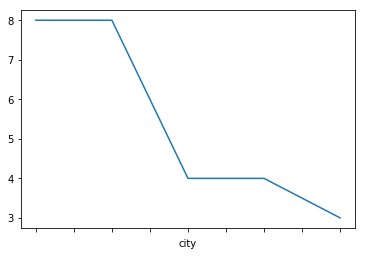

In [203]:
d.plot() 

In [143]:

print("***********")
print("tüm grup")
print("***********")
print('tek 1.pozisyon\n' ,show_distribution(nmatch_str,0,1))
print('\nİlk 2 pozisyon\n' ,show_distribution(nmatch_str,0,2))
print('\nTek 2. pozisyon\n' ,show_distribution(nmatch_str,1,2))

,city
0,01
1,78
2,43
3,41
4,43
5,06
6,16
7,10
8,06
9,06
